In [65]:
# Ramberg-Osgood stress strain law

In [79]:
import sympy as sp
import matplotlib.pyplot as plt

In [80]:
# define symbols
sigma, E, alpha, sigma_0, m, P, A, delta,L = sp.symbols('sigma,E,alpha,sigma_0,m,P,A,delta,L')

In [81]:
display(sigma,E,alpha,sigma_0,m)

sigma

E

alpha

sigma_0

m

In [82]:
epsilon = sigma/E + alpha*(sigma/sigma_0)**m
epsilon

alpha*(sigma/sigma_0)**m + sigma/E

In [83]:
# define nonlinear function of sigma
f = epsilon - delta/L

In [84]:
f

alpha*(sigma/sigma_0)**m - delta/L + sigma/E

In [85]:
fp = sp.diff(f,sigma)
fp

alpha*m*(sigma/sigma_0)**m/sigma + 1/E

In [86]:
# Define parameters (user input)
params = {
    E: 30e6,
    sigma_0: 30000,
    m: 4,
    delta: 0.1,
    L: 120.0,
    alpha: 0.002,
}



# Newton's method iterations
niter = 12
tol = 1e-12
residual = []
iterations = []
sigmai = 25000.0
for i in range(niter):
    fi = f.subs(params).subs(sigma,sigmai)
    ri = abs(fi)
    residual.append(ri)
    iterations.append(i)
    if ri < tol:
        break
    fpi = fp.subs(params).subs(sigma,sigmai)
    dsigmai = -fi/fpi
    sigmai = sigmai + dsigmai

print(i)
print(residual)
    
    
    

5
[0.000964506172839506, 0.000212804122257235, 2.02339314231959e-5, 2.37153935177205e-7, 3.35821053582507e-11, 7.58941520739853e-19]


In [87]:
sigmai

17711.1863832283

In [88]:
iterations

[0, 1, 2, 3, 4, 5]

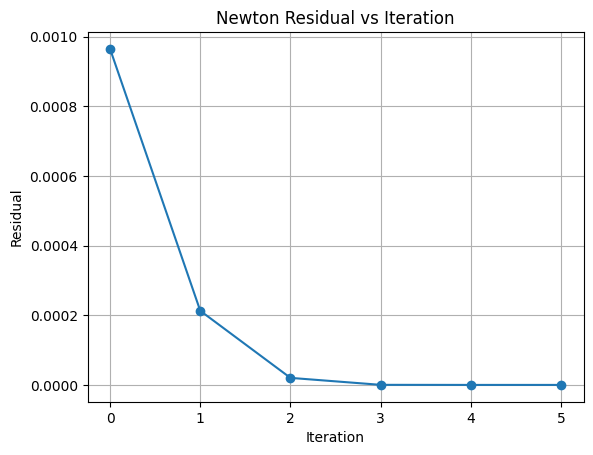

In [94]:
plt.plot(iterations, residual, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Newton Residual vs Iteration')
plt.grid(True)
plt.show()